In [1]:
import numpy as np
import pandas as pd

In [2]:
# load result_dict.csv (separated by tabs)
result_df = pd.read_csv('result_dict.csv', sep='\t')

In [3]:
print(result_df)

    Variable Name  Accepted     Mapping Function     Category
0          _STATE     False                None,  Categorical
1          FMONTH     False                None,  Categorical
2           IDATE     False                None,  Categorical
3          IMONTH     False                None,  Categorical
4            IDAY     False                None,  Categorical
..            ...       ...                  ...          ...
325      _RFSEAT2     False                None,  Categorical
326      _RFSEAT3     False                None,  Categorical
327      _FLSHOT6     False  lambda value: None,  Categorical
328      _PNEUMO2     False                None,  Categorical
329      _AIDTST3     False                None,  Categorical

[330 rows x 4 columns]


In [4]:
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)


In [99]:
# # keep only the features that are accepted

# llm_filtered_features = []
# for feature in features[1:]:
#     # check if result_df has accepted the feature
#     if result_df.loc[result_df['Variable Name'] == feature]['Accepted'].values[0]:
#         llm_filtered_features.append(feature)
# llm_filtered_features.append("WTKG3")
# llm_filtered_features.append("ACTIN11_")

# indices_llm_filtered_features = [np.where(features == feature)[0][0] for feature in llm_filtered_features]
# print(llm_filtered_features)
# print(indices_llm_filtered_features)
# print(len(llm_filtered_features))

# #test
# # llm_filtered_features = features[1:]
# # indices_llm_filtered_features = [np.where(features == feature)[0][0] for feature in llm_filtered_features]
# # print(llm_filtered_features)
# # print(indices_llm_filtered_features)

['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'TOLDHI2', 'CVDSTRK3', 'CHCOCNCR', 'ADDEPEV2', 'DIABETE3', 'SEX', 'EDUCA', 'QLACTLM2', 'DIFFWALK', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'FVBEANS', 'EXERANY2', 'EXERHMM1', 'STRENGTH', 'LMTJOIN3', 'JOINPAIN', 'SEATBELT', 'FLUSHOT6', 'PREDIAB1', 'BLDSUGAR', 'DIABEYE', 'CAREGIV1', 'CRGVHRS1', 'VIDFCLT2', 'CIMEMLOS', 'CDHOUSE', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'DRADVISE', 'ASDRVIST', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'CVDASPRN', 'ASPUNSAF', 'ARTHWGT', 'HADSGCO1', 'PCDMDECN', 'SCNTMNY1', 'SCNTMEL1', 'SCNTPAID', 'RCSGENDR', 'ADPLEASR', 'ADDOWN', 'ADENERGY', 'ADTHINK', 'ADMOVE', 'MISTMNT', 'ADANXEV', 'MSCODE', '_CPRACE', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_LTASTH1', '_CASTHM1', '_DRDXAR1', '_MRACE1', '_RACEGR3', '_AGEG5YR', '_AGE_G', 'HTM4', '_RFBMI5', '_EDUCAG', '_SMOKER3', '_RFBING5', '_DRNKWEK', '_RFDRHV5', 'FTJUDA1_', 'METVL1

In [5]:
# all features become categorical for homogeneity

mapping_dict = {
    "PHYSHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "MENTHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "POORHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "HLTHPLN1": lambda value: 1 if value == 1 else 0,
    "PERSDOC2": lambda value: 1 if value == 1 else 0,
    "MEDCOST": lambda value: 1 if value == 1 else 0,
    "CHECKUP1": lambda value: value if value <= 4 or value==8 else -1,
    "BPHIGH4": lambda value: 1 if value == 1 else 0,
    "BPMEDS": lambda value: 1 if value == 1 else 0,
    "BLOODCHO": lambda value: 1 if value == 1 else 0,
    "TOLDHI2": lambda value: 1 if value == 1 else 0,
    "CVDSTRK3": lambda value: 1 if value == 1 else 0,
    "CHCOCNCR": lambda value: 1 if value == 1 else 0,
    "ADDEPEV2": lambda value: 1 if value == 1 else 0,
    "DIABETE3": lambda value: 1 if value == 1 else 0,
    "SEX": lambda value: 1 if value == 1 else 0,
    "EDUCA": lambda value: value,
    "WTKG3": lambda value: 77 if value <= 77 else 132 if value <= 132 else 187 if value <= 187 else 242 if value <= 242 else 295 if value <= 295 else -1,
    # "WEIGHT2": lambda value: int(str(value).split('-')[0]) if not np.isnan(value) else None,
    "QLACTLM2": lambda value: 1 if value == 1 else 0,
    "DIFFWALK": lambda value: 1 if value == 1 else 0,
    "SMOKDAY2": lambda value: value if value <= 3 else -1,
    "LASTSMK2": lambda value: 1 if value == 1 else 0,
    "USENOW3": lambda value: value if value <= 3 else -1,
    # "ALCDAY5": lambda value: int(str(value).split(' - ')[0]) if value not in [777, 888, 999] else None,
    "AVEDRNK2": lambda value: str(value//20) if value <=76 else -1,
    "DRNK3GE5": lambda value: str(value//20) if value <=76 else -1,
    # "FVBEANS": lambda value: str(value//100) if value <= 400 else "NEVER" if value==555 else -1,
    "EXERANY2": lambda value: 1 if value == 1 else 0,
    "EXERHMM1": lambda value: str(value//200) if value <= 959 and value not in [777,999] else -1,
    # "STRENGTH": lambda x: int(str(x).split('-')[0]) if x not in [777, 888, 999] else None,
    "LMTJOIN3": lambda value: value if value <= 2 else -1,
    # "JOINPAIN": lambda x: float(x) if x not in [77, 99] else None,
    # "SEATBELT": lambda value: 1 if value == 1 else 0,
    "FLUSHOT6": lambda value: 1 if value == 1 else 0,
    # "CAREGIV1": lambda x: 1 if x == 1 else 0,
    "CIMEMLOS": lambda value: 1 if value == 1 else 0,
    # "MSCODE": lambda x: 1 if x == 1 else 2 if x == 2 else 3 if x == 3 else 4,
    "_HCVU651": lambda value: value if value <= 2 else -1,
    "_RFHYPE5": lambda value: value if value <= 2 else -1,
    "_CHOLCHK": lambda value: value if value <= 3 else -1,
    "_LTASTH1": lambda value: value if value <= 2 else -1,
    "_CASTHM1": lambda value: value if value <= 2 else -1,
    "_DRDXAR1": lambda value: 1 if value == 1 else 0,
    # "_MRACE1": lambda value: str(value),
    # "_RACEGR3": lambda value: str(value),
    "_AGEG5YR": lambda value: value,
    "_AGE_G": lambda value: value,
    "HTM4": lambda value: 150 if value <= 150 else 160 if value <= 160 else 175 if value <= 175 else 190 if value <= 190 else 200 if value > 190 else -1,
    "_RFBMI5": lambda value: 1 if value == 2 else 0,
    "_EDUCAG": lambda value: value if value <= 4 else -1,
    "_SMOKER3": lambda value: value if value <= 3 else -1,
    "_RFBING5": lambda value: 1 if value == 2 else 0,
    # "_DRNKWEK": lambda value: int(value) if value not in [0, 99900] else 0,
    "_RFDRHV5": lambda value: 1 if value == 2 else 0,
    "FTJUDA1_": lambda value: 0 if value == 0 else 10 if value <= 1000 else 30 if value <= 3000 else 70 if value <= 7000 else 9999 if value <=9999 else -1,
    # "METVL11_": lambda x: int(x) if not np.isnan(x) else None,
    # "METVL21_": lambda x: int(x) if not np.isnan(x) else None,
    "MAXVO2_": lambda value: value//100 if value <= 600 else -1,
    # "bda value: int(str(x).split()[0]) if x != 99900 else 0,
    "ACTIN11_": lambda value: value if value <= 2 else -1,
    "ACTIN21_": lambda value: value if value <= 2 else -1,
    # "PADUR1_": lambda value: int(str(value).split(" ")[0].strip("0-")) if not np.isnan(value) else None,
    # "PAFREQ1_": lambda x: int(str(x).split(' - ')[0]) if not np.isnan(x) else None,
    # "_MINAC21": lambda value: int(value) if not np.isnan(value) else None,
    # "STRFREQ_": lambda value: float(str(value).split(" ")[0].strip()) if value not in [99000, np.nan] else None,
    # "PAMIN11_": lambda value: int(str(value).split(' - ')[0]) if not np.isnan(value) else None,
    # "PA1MIN_": lambda x: int(float(str(x).split()[0])) if not np.isnan(x) else None,
    # "PAVIG11_": lambda value: int(str(value).split('-')[0]) if not np.isnan(value) else None,
    # "PAVIG21_": lambda x: int(str(x).split(' - ')[0]) if not np.isnan(x) else None,
    # "PA1VIGM_": lambda x: int(x) if not np.isnan(x) and str(x).isdigit() else None,
    "_PACAT1": lambda value: value if value <= 9 else -1,
    "_PA150R2": lambda value: value if value <= 9 else -1,
    "_PA300R2": lambda value: value if value <= 9 else -1,
    "_PASTRNG":  lambda value: value if value <= 9 else -1,
    "_PASTAE1": lambda value: value if value <= 9 else -1,
    "_LMTACT1": lambda value: value if value <= 9 else -1,
    "_LMTWRK1": lambda value: value if value <= 3 else -1,
    "_LMTSCL1": lambda value: value if value <= 4 else -1
}


In [6]:
data = np.column_stack((x_train, y_train[:,1]))


In [7]:
final_features = list(mapping_dict.keys())

print(len(final_features))

# apply the mappings to the data
data = np.column_stack((x_train, y_train[:,1]))
for feature in final_features:
    data[:, np.where(features == feature)[0][0]] = np.array([mapping_dict[feature](value) for value in data[:, np.where(features == feature)[0][0]]])



56


In [8]:
# for each filtered feature, get the ratio of nan values in x_train
nan_ratios = []
for feature in final_features:
    index = np.where(features == feature)[0][0]
    nan_ratios.append(np.sum(np.isnan(data[:, index])) / data.shape[0])

# print the nan ratios with the corresponding feature
print(list(zip(final_features, nan_ratios)))

# keep only the features that have less than 80% nan values
# llm_filtered_features = [feature for feature, nan_ratio in zip(final_features, nan_ratios) if nan_ratio < 0.8]
# indices_llm_filtered_features = [np.where(features == feature)[0][0] for feature in llm_filtered_features]


[('PHYSHLTH', 0.0), ('MENTHLTH', 0.0), ('POORHLTH', 0.0), ('HLTHPLN1', 0.0), ('PERSDOC2', 0.0), ('MEDCOST', 0.0), ('CHECKUP1', 0.0), ('BPHIGH4', 0.0), ('BPMEDS', 0.0), ('BLOODCHO', 0.0), ('TOLDHI2', 0.0), ('CVDSTRK3', 0.0), ('CHCOCNCR', 0.0), ('ADDEPEV2', 0.0), ('DIABETE3', 0.0), ('SEX', 0.0), ('EDUCA', 0.0), ('WTKG3', 0.0), ('QLACTLM2', 0.0), ('DIFFWALK', 0.0), ('SMOKDAY2', 0.0), ('LASTSMK2', 0.0), ('USENOW3', 0.0), ('AVEDRNK2', 0.0), ('DRNK3GE5', 0.0), ('EXERANY2', 0.0), ('EXERHMM1', 0.0), ('LMTJOIN3', 0.0), ('FLUSHOT6', 0.0), ('CIMEMLOS', 0.0), ('_HCVU651', 0.0), ('_RFHYPE5', 0.0), ('_CHOLCHK', 0.0), ('_LTASTH1', 0.0), ('_CASTHM1', 0.0), ('_DRDXAR1', 0.0), ('_AGEG5YR', 0.0), ('_AGE_G', 0.0), ('HTM4', 0.0), ('_RFBMI5', 0.0), ('_EDUCAG', 0.0), ('_SMOKER3', 0.0), ('_RFBING5', 0.0), ('_RFDRHV5', 0.0), ('FTJUDA1_', 0.0), ('MAXVO2_', 0.0), ('ACTIN11_', 0.0), ('ACTIN21_', 0.0), ('_PACAT1', 0.0), ('_PA150R2', 0.0), ('_PA300R2', 0.0), ('_PASTRNG', 0.0), ('_PASTAE1', 0.0), ('_LMTACT1', 0.0), 

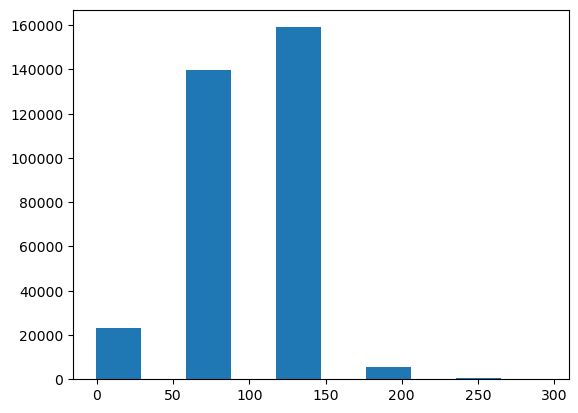

In [9]:
# plot a histogram of the feature "WTKG3"
import matplotlib.pyplot as plt
plt.hist(data[:, np.where(features == "WTKG3")[0][0]])
plt.show()

In [10]:
# get the number of unique values for each feature
unique_values = []
for feature in final_features:
    index = np.where(features == feature)[0][0]
    unique_values.append(len(np.unique(data[:, index])))
# print the number of unique values with the corresponding feature
print(list(zip(final_features, unique_values)))

[('PHYSHLTH', 4), ('MENTHLTH', 4), ('POORHLTH', 4), ('HLTHPLN1', 2), ('PERSDOC2', 2), ('MEDCOST', 2), ('CHECKUP1', 6), ('BPHIGH4', 2), ('BPMEDS', 2), ('BLOODCHO', 2), ('TOLDHI2', 2), ('CVDSTRK3', 2), ('CHCOCNCR', 2), ('ADDEPEV2', 2), ('DIABETE3', 2), ('SEX', 2), ('EDUCA', 7), ('WTKG3', 6), ('QLACTLM2', 2), ('DIFFWALK', 2), ('SMOKDAY2', 4), ('LASTSMK2', 2), ('USENOW3', 4), ('AVEDRNK2', 5), ('DRNK3GE5', 5), ('EXERANY2', 2), ('EXERHMM1', 6), ('LMTJOIN3', 3), ('FLUSHOT6', 2), ('CIMEMLOS', 2), ('_HCVU651', 3), ('_RFHYPE5', 3), ('_CHOLCHK', 4), ('_LTASTH1', 3), ('_CASTHM1', 3), ('_DRDXAR1', 2), ('_AGEG5YR', 14), ('_AGE_G', 6), ('HTM4', 2), ('_RFBMI5', 2), ('_EDUCAG', 5), ('_SMOKER3', 4), ('_RFBING5', 2), ('_RFDRHV5', 2), ('FTJUDA1_', 3), ('MAXVO2_', 2), ('ACTIN11_', 4), ('ACTIN21_', 4), ('_PACAT1', 5), ('_PA150R2', 4), ('_PA300R2', 4), ('_PASTRNG', 3), ('_PASTAE1', 3), ('_LMTACT1', 5), ('_LMTWRK1', 4), ('_LMTSCL1', 5)]


In [11]:
import numpy as np
from tqdm import tqdm

# Function to calculate entropy
def calculate_entropy(probabilities):
    # Calculate entropy: H(X) = -sum(p(x) * log2(p(x)))
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

entropies = []
entropies_normalized = []
joint_entropies = []
joint_entropies_normalized = []

# Filter the rows based on target values
filtered_rows_Y1 = data[data[:, -1] == 1]
filtered_rows_Y_minus1 = data[data[:, -1] == -1]

# Total counts for probabilities
count_Y1 = len(filtered_rows_Y1)
count_Y_minus1 = len(filtered_rows_Y_minus1)
total_count = count_Y1 + count_Y_minus1

# Calculate probabilities of Y
p_Y1 = count_Y1 / total_count
p_Y_minus1 = count_Y_minus1 / total_count

# Iterate over the indices of the features
for index in tqdm(final_features):
    feature_index = np.where(features == index)[0][0]  # Convert feature name to index
    # Get the feature values for the entire dataset (to find all unique values)
    all_feature_values = data[:, feature_index]
    unique_values_all, counts_all = np.unique(all_feature_values, return_counts=True)
    
    # Get the feature values for the filtered rows where Y=1
    feature_values_Y1 = filtered_rows_Y1[:, feature_index]
    non_nan_values_Y1 = feature_values_Y1[~np.isnan(feature_values_Y1)]
    
    # Get the counts for each unique value in filtered rows where Y=1
    unique_values_filtered_Y1, counts_filtered_Y1 = np.unique(non_nan_values_Y1, return_counts=True)
    
    # Create a dictionary for filtered counts where Y=1
    filtered_count_dict_Y1 = dict(zip(unique_values_filtered_Y1, counts_filtered_Y1))

    # Initialize the probabilities list for Y=1
    probabilities_Y1 = []
    
    # Calculate probabilities for Y=1
    for value in unique_values_all:
        count = filtered_count_dict_Y1.get(value, 0)  # Default to 0 if not found
        probabilities_Y1.append(count / np.sum(counts_filtered_Y1) if np.sum(counts_filtered_Y1) > 0 else 0)  # Probabilities

    # Compute the entropy for Y=1
    entropy_Y1 = calculate_entropy(probabilities_Y1)
    
    # Get the feature values for the filtered rows where Y=-1
    feature_values_Y_minus1 = filtered_rows_Y_minus1[:, feature_index]
    non_nan_values_Y_minus1 = feature_values_Y_minus1[~np.isnan(feature_values_Y_minus1)]
    
    # Get the counts for each unique value in filtered rows where Y=-1
    unique_values_filtered_Y_minus1, counts_filtered_Y_minus1 = np.unique(non_nan_values_Y_minus1, return_counts=True)
    
    # Create a dictionary for filtered counts where Y=-1
    filtered_count_dict_Y_minus1 = dict(zip(unique_values_filtered_Y_minus1, counts_filtered_Y_minus1))

    # Initialize the probabilities list for Y=-1
    probabilities_Y_minus1 = []
    
    # Calculate probabilities for Y=-1
    for value in unique_values_all:
        count = filtered_count_dict_Y_minus1.get(value, 0)  # Default to 0 if not found
        probabilities_Y_minus1.append(count / np.sum(counts_filtered_Y_minus1) if np.sum(counts_filtered_Y_minus1) > 0 else 0)  # Probabilities

    # Compute the entropy for Y=-1
    entropy_Y_minus1 = calculate_entropy(probabilities_Y_minus1)
    
    # Calculate the joint entropy H(f|Y)
    joint_entropy = (p_Y1 * entropy_Y1) + (p_Y_minus1 * entropy_Y_minus1)
    
    # Normalize entropies
    entropy_normalized_Y1 = entropy_Y1 / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0
    entropy_normalized_Y_minus1 = entropy_Y_minus1 / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0
    
    # Append results
    entropies.append((entropy_Y1, entropy_Y_minus1))
    entropies_normalized.append((entropy_normalized_Y1, entropy_normalized_Y_minus1))
    joint_entropies.append(joint_entropy)
    joint_entropies_normalized.append(joint_entropy / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0)



100%|██████████| 56/56 [00:03<00:00, 16.65it/s]


[('PHYSHLTH', 0.6926395981331513), ('MENTHLTH', 0.6288092859680425), ('POORHLTH', 0.5193773704655769), ('HLTHPLN1', 0.3882060372499137), ('PERSDOC2', 0.770895698518557), ('MEDCOST', 0.46171813299547293), ('CHECKUP1', 0.5122936008338014), ('BPHIGH4', 0.9383350161150439), ('BPMEDS', 0.8850853256813384), ('BLOODCHO', 0.5596165223178518), ('TOLDHI2', 0.9189379534896296), ('CVDSTRK3', 0.22672173967680864), ('CHCOCNCR', 0.460349815089355), ('ADDEPEV2', 0.6964503278216629), ('DIABETE3', 0.5355990144441408), ('SEX', 0.9792168840480959), ('EDUCA', 0.6928230053397967), ('WTKG3', 0.5498223616085672), ('QLACTLM2', 0.7748418647203101), ('DIFFWALK', 0.625771546756419), ('SMOKDAY2', 0.7371199324858164), ('LASTSMK2', 0.05172054518084389), ('USENOW3', 0.22951100280849968), ('AVEDRNK2', 0.4329013248604866), ('DRNK3GE5', 0.23504856726541115), ('EXERANY2', 0.9098510639906292), ('EXERHMM1', 0.5579209102065361), ('LMTJOIN3', 0.7404664177156849), ('FLUSHOT6', 0.9838872581514774), ('CIMEMLOS', 0.1783606282528

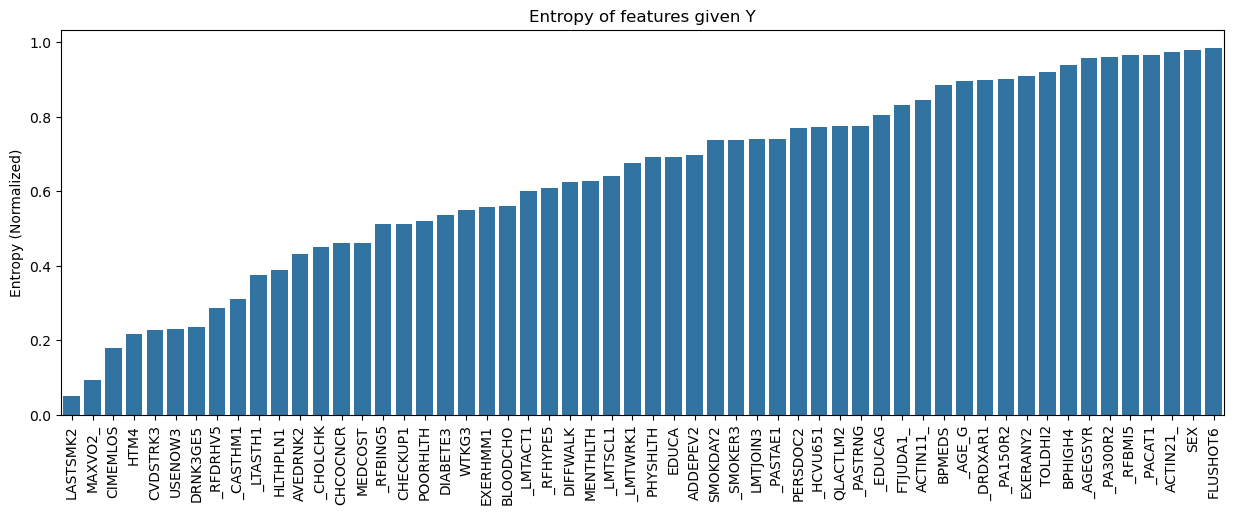

In [12]:
# print the entropies with the corresponding feature
print(list(zip(final_features, joint_entropies_normalized)))

# plot the joint_entropies_normalized in seaborn in a bar plot (sorted by entropy)
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the features by entropy
sorted_indices = np.argsort(joint_entropies_normalized)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_entropies = [joint_entropies_normalized[i] for i in sorted_indices]

# Plot the entropies
plt.figure(figsize=(15, 5))
sns.barplot(x=sorted_features, y=sorted_entropies)
plt.xticks(rotation=90)
plt.ylabel('Entropy (Normalized)')
plt.title('Entropy of features given Y')
plt.show()

2


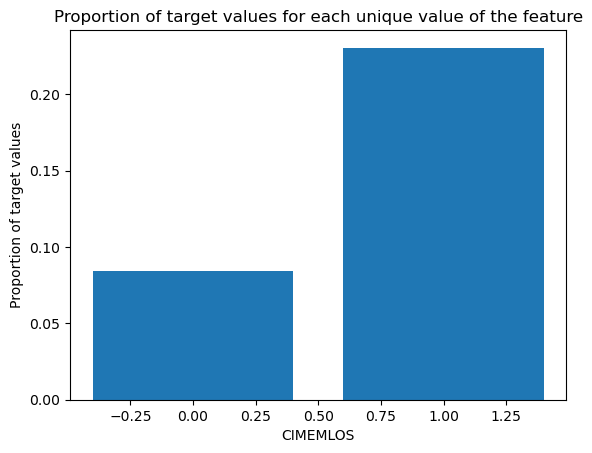

In [14]:
feature = "CIMEMLOS" # categorical feature
feature_index = np.where(features == feature)[0][0]
feature_values = data[:, feature_index]
unique_values = np.unique(feature_values)
print(len(unique_values))
target_values = data[:, -1] # values in {1, -1}

# plot a bar plot (one bar for each unique value of the feature) showing the proportion of target values for each unique value of the feature
proportions = []
for value in unique_values:
    target_values_for_value = target_values[feature_values == value]
    proportions.append(np.sum(target_values_for_value == 1) / len(target_values_for_value))

plt.bar(unique_values, proportions)
plt.xlabel(feature)
plt.ylabel('Proportion of target values')
plt.title('Proportion of target values for each unique value of the feature')
plt.show()

In [15]:
proportion_diffs = []
for feature in final_features:
    feature_index = np.where(features == feature)[0][0]
    feature_values = data[:, feature_index]
    unique_values = np.unique(feature_values)
    target_values = data[:, -1] # values in {1, -1}
    proportions = []
    for value in unique_values:
        target_values_for_value = target_values[feature_values == value]
        proportions.append(np.sum(target_values_for_value == 1) / len(target_values_for_value))
    proportion_diffs.append(np.max(proportions) - np.min(proportions))



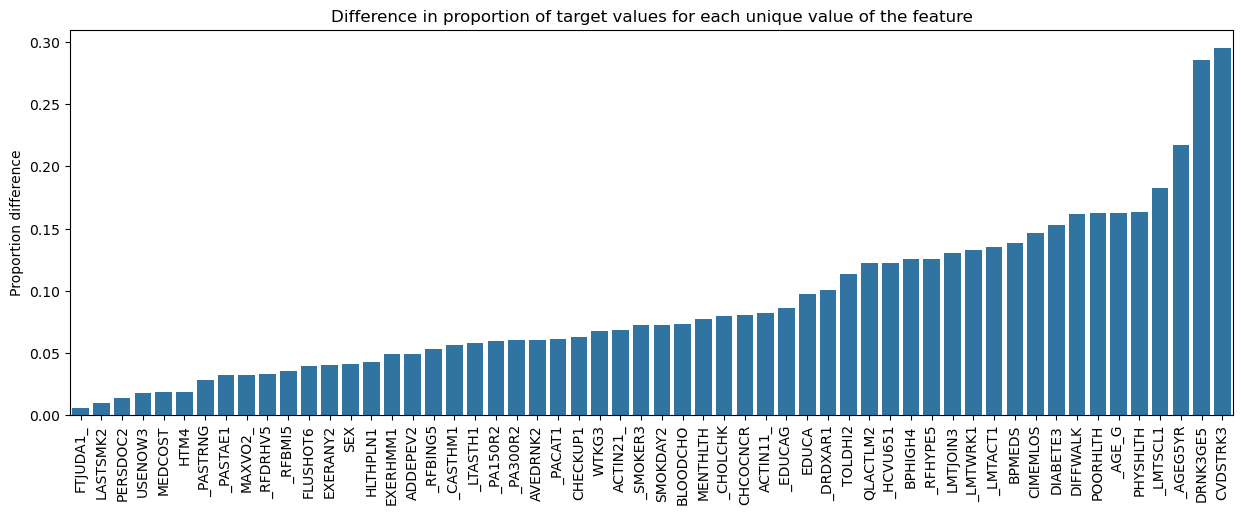

In [16]:
# plot the proportion_diffs in seaborn in a bar plot (sorted by proportion_diff)
# Sort the features by proportion_diff
sorted_indices = np.argsort(proportion_diffs)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_proportion_diffs = [proportion_diffs[i] for i in sorted_indices]

# Plot the proportion_diffs
plt.figure(figsize=(15, 5))
sns.barplot(x=sorted_features, y=sorted_proportion_diffs)
plt.xticks(rotation=90)
plt.ylabel('Proportion difference')
plt.title('Difference in proportion of target values for each unique value of the feature')
plt.show()

## NAIVE BAYES CLASSIFIER

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Assuming 'data' is your dataset
# sorted_indices, joint_entropies_normalized, final_features, features are already defined

# Sort features by entropy and select the top 5
# sorted_indices = np.argsort(joint_entropies_normalized)
# sorted_features = [final_features[i] for i in sorted_indices]
# sorted_entropies = [joint_entropies_normalized[i] for i in sorted_indices]
sorted_indices = np.argsort(proportion_diffs)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_proportion_diffs = [proportion_diffs[i] for i in sorted_indices]
list_features = sorted_features[::-1][:15]
indices_final_features = [np.where(features == feature)[0][0] for feature in list_features]
print(list_features)
# Extract features (X) and labels (y)
x = data[:, indices_final_features]
y = data[:, -1]  # Assuming the last column is the label

# Split the data into train and test sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Convert categorical features to integers using LabelEncoder
label_encoders = []
for i in range(x_train_filtered.shape[1]):
    le = LabelEncoder()
    x_train_filtered[:, i] = le.fit_transform(x_train_filtered[:, i])
    label_encoders.append(le)  # Store the encoder for inverse_transform later if needed

# Encode the test data using the same LabelEncoders
for i in range(x_test_filtered.shape[1]):
    x_test_filtered[:, i] = label_encoders[i].transform(x_test_filtered[:, i])

# Implement Random Oversampling to balance the classes in the training set
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_filtered, y_train_filtered)

# Train a Naive Bayes model
model = LogisticRegression()
model.fit(x_train_resampled, y_train_resampled)

# Now predict on the test set
y_pred = model.predict(x_test_filtered)

# Calculate metrics
accuracy = accuracy_score(y_test_filtered, y_pred)
f1 = f1_score(y_test_filtered, y_pred)
precision = precision_score(y_test_filtered, y_pred)
recall = recall_score(y_test_filtered, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


['CVDSTRK3', 'DRNK3GE5', '_AGEG5YR', '_LMTSCL1', 'PHYSHLTH', '_AGE_G', 'POORHLTH', 'DIFFWALK', 'DIABETE3', 'CIMEMLOS', 'BPMEDS', '_LMTACT1', '_LMTWRK1', 'LMTJOIN3', '_RFHYPE5']
Accuracy: 0.7231322473981745
F1: 0.32473613795153855
Precision: 0.20614324808908183
Recall: 0.7646132306615331


In [166]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Assuming 'data' is your dataset
# sorted_indices, joint_entropies_normalized, final_features, features are already defined

# Sort features by entropy and select the top 5
# sorted_indices = np.argsort(joint_entropies_normalized)
# sorted_features = [final_features[i] for i in sorted_indices]
# sorted_entropies = [joint_entropies_normalized[i] for i in sorted_indices]
sorted_indices = np.argsort(proportion_diffs)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_proportion_diffs = [proportion_diffs[i] for i in sorted_indices]
list_features = sorted_features[::-1][:5]
# list_features = sorted_features[::1][:5]
indices_final_features = [np.where(features == feature)[0][0] for feature in list_features]

# Extract features (X) and labels (y)
x = data[:, indices_final_features]
y = data[:, -1]  # Assuming the last column is the label

# Split the data into train and test sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Convert categorical features to integers using LabelEncoder
label_encoders = []
for i in range(x_train_filtered.shape[1]):
    le = LabelEncoder()
    x_train_filtered[:, i] = le.fit_transform(x_train_filtered[:, i])
    label_encoders.append(le)  # Store the encoder for inverse_transform later if needed

# Encode the test data using the same LabelEncoders
for i in range(x_test_filtered.shape[1]):
    x_test_filtered[:, i] = label_encoders[i].transform(x_test_filtered[:, i])

# Implement Random Oversampling to balance the classes in the training set
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_filtered, y_train_filtered)

# Train a Naive Bayes model
model = CategoricalNB()
model.fit(x_train_resampled, y_train_resampled)

# Now predict on the test set
y_pred = model.predict(x_test_filtered)

# Calculate metrics
accuracy = accuracy_score(y_test_filtered, y_pred)
f1 = f1_score(y_test_filtered, y_pred)
precision = precision_score(y_test_filtered, y_pred)
recall = recall_score(y_test_filtered, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.6966492449753913
F1: 0.29298955891753675
Precision: 0.18379076813402245
Recall: 0.7219110955547777


In [167]:
# HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Assume final_features and data are already defined
# indices_final_features extracts the columns corresponding to final_features
# sorted_indices = np.argsort(joint_entropies_normalized)
# sorted_features = [final_features[i] for i in sorted_indices]
# sorted_entropies = [joint_entropies_normalized[i] for i in sorted_indices]
# list_features = sorted_features[::][:10]
sorted_indices = np.argsort(proportion_diffs)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_proportion_diffs = [proportion_diffs[i] for i in sorted_indices]
list_features = sorted_features[::-1][:15]
indices_final_features = [np.where(features == feature)[0][0] for feature in list_features]

# Extract features (X) and labels (y)
x = data[:, indices_final_features]
y = data[:, -1]  # Assuming the last column is the label

# Split the data into train and test sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    x, y, test_size=0.2, random_state=42
)
# Train a HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier(
    class_weight="balanced",
    learning_rate=0.1,
    max_iter=1000,
    max_leaf_nodes=30,
    l2_regularization=0.1
)
model.fit(x_train_filtered, y_train_filtered)



# Now predict on the test set
y_pred = model.predict(x_test_filtered)

# Calculate the accuracy
accuracy = accuracy_score(y_test_filtered, y_pred)
#calculate f1 score
f1 = f1_score(y_test_filtered, y_pred)
#calculate precision
precision = precision_score(y_test_filtered, y_pred)
#calculate recall
recall = recall_score(y_test_filtered, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.7000319990247916
F1: 0.31740638002773924
Precision: 0.19791576580472195
Recall: 0.8010150507525376


In [175]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

sorted_indices = np.argsort(proportion_diffs)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_proportion_diffs = [proportion_diffs[i] for i in sorted_indices]
list_features = sorted_features[::-1][:]
indices_final_features = [np.where(features == feature)[0][0] for feature in list_features]

# Extract features (X) and labels (y)
x = data[:, indices_final_features]
y = data[:, -1]  # Assuming the last column is the label

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Train a RandomForestClassifier model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight="balanced",
    random_state=42
)
model.fit(x_train_filtered, y_train_filtered)

# Now predict on the test set
y_pred = model.predict(x_test_filtered)

# Calculate the accuracy
accuracy = accuracy_score(y_test_filtered, y_pred)
# Calculate f1 score
f1 = f1_score(y_test_filtered, y_pred)
# Calculate precision
precision = precision_score(y_test_filtered, y_pred)
# Calculate recall
recall = recall_score(y_test_filtered, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6994986819449313
F1: 0.3197074752492325
Precision: 0.19909774436090225
Recall: 0.8109905495274764


In [176]:
# ratio y_pred=1/y_pred
y_pred_1 = np.sum(y_pred == 1) / len(y_pred)
print(y_pred_1)

0.3546558581071815


## NEW TEST

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Assume data, features, final_features, and proportion_diffs are defined above
sorted_indices = np.argsort(proportion_diffs)
sorted_features = [final_features[i] for i in sorted_indices]
sorted_proportion_diffs = [proportion_diffs[i] for i in sorted_indices]
list_features = sorted_features[::-1][:]
indices_final_features = [np.where(features == feature)[0][0] for feature in list_features]

# Extract features (X) and labels (y)
x = data[:, indices_final_features]
y = data[:, -1]  # Assuming the last column is the label



# Split the data into train and test sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Apply one-hot encoding on x_train_filtered and x_test_filtered
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to return a dense array

# Fit the encoder on the training data and transform both train and test sets
x_train_filtered = one_hot_encoder.fit_transform(x_train_filtered)
x_test_filtered = one_hot_encoder.transform(x_test_filtered)

# Compute class weights for balancing the dataset
class_weight_list = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_filtered), y=y_train_filtered)
class_weight = dict(zip(np.unique(y_train_filtered), class_weight_list))

print("Class Weights: ", class_weight)
print("Encoded X_train shape: ", x_train_filtered.shape)
print("Encoded X_test shape: ", x_test_filtered.shape)
print("Y Train shape", y_train_filtered.shape)
print("Y Test shape", y_test_filtered.shape)


Class Weights:  {-1.0: 0.5486129397651799, 1.0: 5.642663685998023}
Encoded X_train shape:  (262508, 195)
Encoded X_test shape:  (65627, 195)
Y Train shape (262508,)
Y Test shape (65627,)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=1,max_depth=5,class_weight=class_weight,random_state=0)

param_grid = {'n_estimators':[1,2,3],'max_depth':range(3,12)}
# param_grid = {'n_estimators':[1],'max_depth':range(3,4)}

gs = GridSearchCV(rfc, param_grid=param_grid, scoring='f1', cv=2, verbose=3)
gs.fit(x_train_filtered,y_train_filtered)
y_pred = gs.predict(x_test_filtered)
print(gs.best_estimator_)
print("Best score: %0.3f" % gs.best_score_)

from sklearn.metrics import classification_report
print(gs.score(x_test_filtered,y_test_filtered))
print(classification_report(y_test_filtered, y_pred))

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV 1/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=3, n_estimators=1;, score=0.291 total time=   0.6s
[CV 2/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=3, n_estimators=1;, score=0.292 total time=   0.6s
[CV 1/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=3, n_estimators=2;, score=0.301 total time=   0.5s
[CV 2/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=3, n_estimators=2;, score=0.301 total time=   0.6s
[CV 1/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=3, n_estimators=3;, score=0.299 total time=   0.6s
[CV 2/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=3, n_estimators=3;, score=0.300 total time=   0.6s
[CV 1/2] END class_weight={-1.0: 0.5486129397651799, 1.0: 5.642663685998023}, max_depth=4, n_estimators=

Test Accuracy: 75.84%

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.95      0.78      0.85     59913
         1.0       0.19      0.55      0.29      5714

    accuracy                           0.76     65627
   macro avg       0.57      0.67      0.57     65627
weighted avg       0.88      0.76      0.81     65627



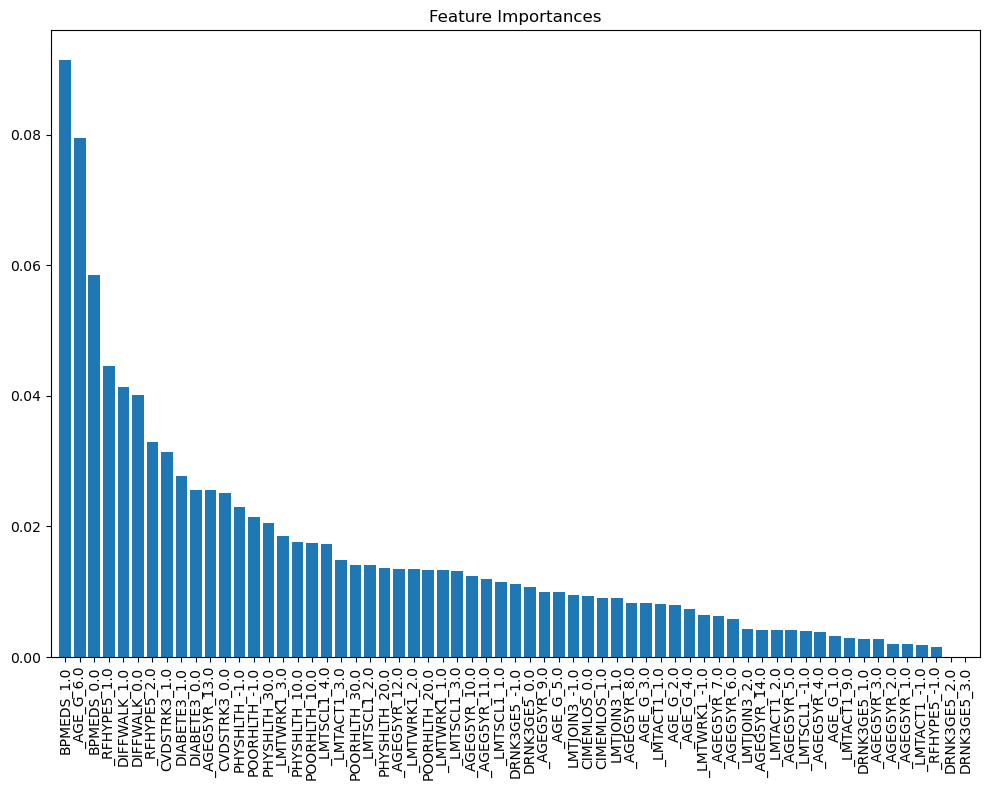

Most important features (in descending order of importance):
1. BPMEDS_1.0: 0.0914
2. _AGE_G_6.0: 0.0795
3. BPMEDS_0.0: 0.0585
4. _RFHYPE5_1.0: 0.0446
5. DIFFWALK_1.0: 0.0414
6. DIFFWALK_0.0: 0.0401
7. _RFHYPE5_2.0: 0.0329
8. CVDSTRK3_1.0: 0.0313
9. DIABETE3_1.0: 0.0277
10. DIABETE3_0.0: 0.0256
11. _AGEG5YR_13.0: 0.0256
12. CVDSTRK3_0.0: 0.0250
13. PHYSHLTH_-1.0: 0.0230
14. POORHLTH_-1.0: 0.0214
15. PHYSHLTH_30.0: 0.0206
16. _LMTWRK1_3.0: 0.0185
17. PHYSHLTH_10.0: 0.0177
18. POORHLTH_10.0: 0.0175
19. _LMTSCL1_4.0: 0.0173
20. _LMTACT1_3.0: 0.0148
21. POORHLTH_30.0: 0.0142
22. _LMTSCL1_2.0: 0.0140
23. PHYSHLTH_20.0: 0.0136
24. _AGEG5YR_12.0: 0.0135
25. _LMTWRK1_2.0: 0.0134
26. POORHLTH_20.0: 0.0134
27. _LMTWRK1_1.0: 0.0133
28. _LMTSCL1_3.0: 0.0131
29. _AGEG5YR_10.0: 0.0124
30. _AGEG5YR_11.0: 0.0119
31. _LMTSCL1_1.0: 0.0115
32. DRNK3GE5_-1.0: 0.0112
33. DRNK3GE5_0.0: 0.0107
34. _AGEG5YR_9.0: 0.0100
35. _AGE_G_5.0: 0.0099
36. LMTJOIN3_-1.0: 0.0096
37. CIMEMLOS_0.0: 0.0094
38. CIMEMLOS_1.0:

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(class_weight=class_weight, random_state=42)

# Train the model on the one-hot encoded training data
rf_classifier.fit(x_train_filtered, y_train_filtered)

# Predict on the test data
y_pred_filtered = rf_classifier.predict(x_test_filtered)

# Evaluate the model
accuracy = accuracy_score(y_test_filtered, y_pred_filtered)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test_filtered, y_pred_filtered))

# Feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the original features (before one-hot encoding)
encoded_feature_names = one_hot_encoder.get_feature_names_out(list_features)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(x_train_filtered.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train_filtered.shape[1]), encoded_feature_names[indices], rotation=90)
plt.xlim([-1, x_train_filtered.shape[1]])
plt.tight_layout()
plt.show()

# Print out the most important features
print("Most important features (in descending order of importance):")
for i in range(len(indices)):
    print(f"{i + 1}. {encoded_feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


In [36]:
# keep only 5 most important features according to the random forest classifier
indices_final_features = indices[:5]
# concat x_train_filtered and x_test_filtered
x = np.concatenate((x_train_filtered, x_test_filtered), axis=0)
y = np.concatenate((y_train_filtered, y_test_filtered), axis=0)
x = x[:, indices_final_features]
y = y

# Split the data into train and test sets
x_train_filtered_2, x_test_filtered_2, y_train_filtered_2, y_test_filtered_2 = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# train a logistic regression model
model = LogisticRegression()
model.fit(x_train_filtered_2, y_train_filtered_2)

# Now predict on the test set
y_pred = model.predict(x_test_filtered_2)

print(classification_report(y_test_filtered_2, y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      1.00      0.95     59910
         1.0       0.00      0.00      0.00      5717

    accuracy                           0.91     65627
   macro avg       0.46      0.50      0.48     65627
weighted avg       0.83      0.91      0.87     65627



/home/himmi/Anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/himmi/Anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/himmi/Anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le